# Sparsity and Group Sparsity-inducing One-class SVMs

This notebook examines properties of the sparsity-inducing $\ell_p$-norm regularized one-class SVM. Further, we show when group sparsity (multiple kernel learning) based extension to semi-supervised one-class SVMs works and when it doesn't.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

from tilitools.lp_ocsvm_primal_sgd import LpOcSvmPrimalSGD
%matplotlib inline


In [10]:
DIMS = 20
SAMPLES = 1000
THETA = 0.75

# generate raw training data
Dtrain = np.random.randn(DIMS, SAMPLES)*3+5
Dtrain *= np.random.rand(DIMS, 1)*1.10
Dtrain[0, :] += 0. 
for d in range(1, DIMS):
    Dtrain[d, :] = THETA*Dtrain[d-1, :] + (1.-THETA)*Dtrain[d, :]


Dtrain -= np.mean(Dtrain, axis=1, keepdims=True)
Dtrain /= np.linalg.norm(Dtrain, axis=0, keepdims=True)

[10.32235216 19.24523324 19.58991002 19.37428276  6.9268349   5.75365837
  9.19823836 10.56557884 11.35982678 11.91354796 12.32356773 12.65904715
 12.93097626 13.16310414 13.35459046 13.5325843  13.68508277 13.8216971
 13.94584577 14.05814789]


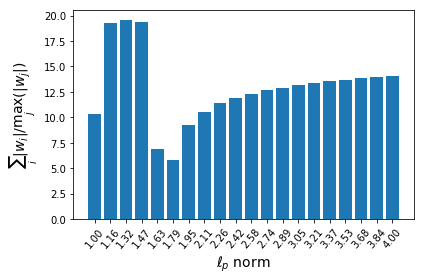

In [11]:
ps = np.linspace(1.0, 4.0, 20)
# nus = np.logspace(-2., 1.0, 10)
# print(nus)
sol = np.zeros(ps.size)
for i in range(ps.size):
    svm = LpOcSvmPrimalSGD(pnorm=ps[i], nu=1.)
    svm.fit(Dtrain, prec=1e-4, step_method=2, step_rate=0.1, max_iter=2000)
#     sol[i] = np.sum(np.abs(svm.w) > 0.001) # *np.mean(np.abs(svm.w)))
    sol[i] = np.sum(np.abs(svm.w)/np.max(np.abs(svm.w))) # *np.mean(np.abs(svm.w)))

print(sol)

fig = plt.figure(1)
# plt.bar(np.arange(DIMS), np.sort(np.abs(svm.w)))
# plt.bar(np.arange(DIMS), svm.w)
plt.bar(np.arange(sol.size), sol)
plt.xticks(np.arange(sol.size), ['{0:1.2f}'.format(ps[i]) for i in range(sol.size)], rotation=50)
plt.xlabel('$\ell_p$ norm', fontsize=14)
plt.ylabel('$\sum_i |w_i| / \max_j ( |w_j| )$', fontsize=14)

fig.tight_layout()
plt.savefig('sparsity_pnorm_example.pdf')
plt.show()

/Users/nicococo/anaconda/envs/torchCpu37/lib/python3.6/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: The bivariate_normal function was deprecated in version 2.2.


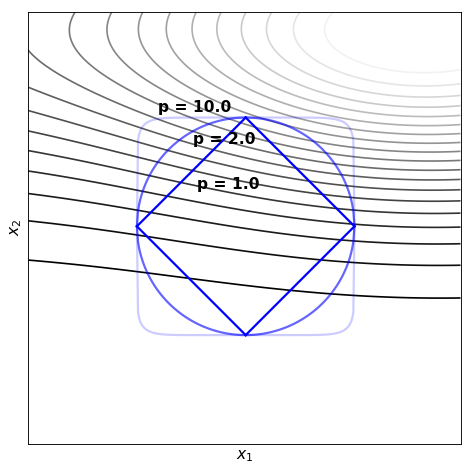

In [12]:
# plot the p-norm
fig = plt.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k')

ps = [1.0, 2.0, 10.]
alphas = [1.0, 0.6, 0.2]
for p, a in zip(ps, alphas):
    x_segment = np.linspace(0, 1, 100)
    y_segment = (1 - x_segment**p)**(1/p)
    plt.plot(+x_segment, +y_segment, '-b', alpha=a, linewidth=2)
    plt.plot(+x_segment, -y_segment, '-b', alpha=a, linewidth=2)
    plt.plot(-x_segment, +y_segment, '-b', alpha=a, linewidth=2)
    plt.plot(-x_segment, -y_segment, '-b', alpha=a, linewidth=2)
    plt.text(-x_segment[50+np.int(4*p)]+0.1, y_segment[70]+0.05, 'p = {0}'.format(p), fontsize=14, weight='bold')
    
delta = 0.025
x = np.arange(-2.0, 2.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
Z = (np.sin(X+Y/9)+6.8)*mlab.bivariate_normal(X, Y, 4.0, 1.0, 2.1, 1.8)
Z[Z<0.] = 0.

CS = plt.contour(X, Y, Z, 20, cmap='gray')
plt.xticks([],[])
plt.yticks([],[])
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
fig.tight_layout()
plt.savefig('sparsity_norm_example.pdf')
plt.show()

/Users/nicococo/anaconda/envs/torchCpu37/lib/python3.6/site-packages/matplotlib/axes/_base.py:3449: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


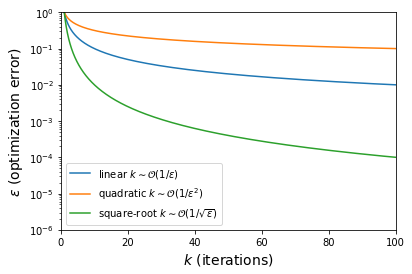

In [13]:
epsilons = np.logspace(-6, 1, 1000)
f_lin = 1./epsilons
f_quad = 1./(epsilons*epsilons)
f_sqrt = 1./np.sqrt(epsilons)
f_loglin = np.log(np.linspace(0.1,10,1000))

plt.figure(1)
plt.plot(f_lin, epsilons)
plt.plot(f_quad, epsilons)
plt.plot(f_sqrt, epsilons)
# plt.plot(f_loglin, epsilons)

plt.semilogy()
plt.ylim([-0.1,1.])
plt.xlim([-0.01,np.max(100)])

plt.xlabel('$k$ (iterations)', fontsize=14)
plt.ylabel('$\epsilon$ (optimization error)', fontsize=14)


plt.legend(['linear $k \sim \mathcal{O}(1/\epsilon)$', 
            'quadratic $k \sim \mathcal{O}(1/\epsilon^2)$', 
            'square-root $k \sim \mathcal{O}(1/\sqrt{\epsilon}$)', 'test'])
# plt.show()
